In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types



Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2.mplstyle, line 35 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_modern.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_serif.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an

Welcome to JupyROOT 6.24/06
The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [6]:
base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15rd/MC15rd_Vg_sigext_maxFBDT_2ndFBDT/'


In [7]:
Vgamma_ccbar = base_file_loc + 'ccbar/*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

Vgamma_uubar = base_file_loc + 'uubar/*.root'
Vgamma_ddbar = base_file_loc + 'ddbar/*.root'
Vgamma_ssbar = base_file_loc + 'ssbar/*.root'
Vgamma_charged = base_file_loc + 'charged/*.root'
Vgamma_mixed = base_file_loc + 'mixed/*.root'
Vgamma_taupair = base_file_loc + 'taupair/*.root'

In [8]:
# base_filter=' D0_M>1.68 && D0_M<2.05'
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.0008 && Dstarp_CMS_p>2.5 && gamma_E>0.48 && Belle2Pi0Veto_75MeV>0.023 '
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5 && Dstarp_isSignal!=1'
# base_filter=' D0_M>1.8 && D0_M<1.9 && Dstarp_isSignal!=1'
# cut value=(0.32, 0.52, 0.0008)
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5 && Dstarp_isSignal!=1'
# base_filter+='&& gamma_E>0.47 && Pi0_Prob2>0.5 && abs(Dstarp_delM-0.1455)<0.00078'
base_filter+='&& gamma_E>0.47  && abs(Dstarp_delM-0.1455)<0.00078'
# base_filter+='&& gamma_E>0.47 && Pi0_Prob2>0.5 && abs(Dstarp_delM-0.1455)<0.00078'

# base_filter+='&& abs(D0_cosHel_0)<0.8'

variables=['__experiment__', '__run__', '__event__','__ncandidates__','__candidate__','Dstarp_chiProb','D0_M','D0_cosHel_0','Phi_M','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','D0_flightDistance','D0_flightDistanceErr']
variables+=['Pi0_Prob2']
variables+=["Dstarp_cosAngleBetweenMomentumAndVertexVector","Dstarp_cosAngleBetweenMomentumAndVertexVectorInXYPlane"]
tree='phi'

In [9]:
# pd_Vgamma_ccbar = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter + ' && ',variables=variables)

pd_Vgamma_ccbar = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_uubar = get_pd(file=Vgamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_ddbar = get_pd(file=Vgamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_ssbar = get_pd(file=Vgamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_charged = get_pd(file=Vgamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_mixed = get_pd(file=Vgamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_taupair = get_pd(file=Vgamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

input_line_86:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_97:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<unsigned int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_112:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [10]:
# cut value=(0.32, 0.52, 0.0008)
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5 && Dstarp_isSignal==1'
base_filter+='&& gamma_E>0.47 && Pi0_Prob2>0.5 && abs(Dstarp_delM-0.1455)<0.00077'
# base_filter+='&& abs(D0_cosHel_0)<0.8'

pd_ccbar_signal = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter ,variables=variables)
# len(pd_ccbar_signal)/365*943/4*2
len(pd_ccbar_signal)/4

127.0

In [11]:
pd_ccbar = pd_Vgamma_ccbar.reset_index(drop=True)
pd_uubar = pd_Vgamma_uubar.reset_index(drop=True)
pd_ddbar = pd_Vgamma_ddbar.reset_index(drop=True)
pd_ssbar = pd_Vgamma_ssbar.reset_index(drop=True)
pd_charged = pd_Vgamma_charged.reset_index(drop=True)
pd_mixed = pd_Vgamma_mixed.reset_index(drop=True)
pd_taupair = pd_Vgamma_taupair.reset_index(drop=True)


In [12]:
pd_ccbar['rank'] = pd_ccbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_uubar['rank'] = pd_uubar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_ddbar['rank'] = pd_ddbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_ssbar['rank'] = pd_ssbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_charged['rank'] = pd_charged.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_mixed['rank'] = pd_mixed.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_taupair['rank'] = pd_taupair.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')

In [13]:
# multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

3619
3628
0.9975192943770672


In [14]:
# plt.hist(pd_ccbar.D0_M, bins=np.linspace(1.68,2.05,51));

# plt.hist(pd_ccbar_signal.D0_M, bins=np.linspace(1.68,2.05,51));

# plt.xlim(1.68,2.05)

In [20]:
cut = 'gamma_E>0.48 & Belle2Pi0Veto_75MeV >0.022'
cut = 'gamma_E>0.0'
cut = 'Dstarp_isSignal!=1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[17.5  23.5  16.75 13.   16.5  17.75 11.25 16.75 12.75 13.25 16.75 18.
 16.25 21.25 27.25 26.25 30.5  43.75 50.   61.75 67.5  71.   63.75 60.
 43.25 21.25 12.75  7.5   5.25  4.    4.5   5.25  4.25  4.5   3.25  6.
  5.25  6.    3.5   3.5   4.25  4.75  3.75  1.75  2.    3.    3.5   2.5
  3.25  5.25]
fitst_bin_entries=17.5


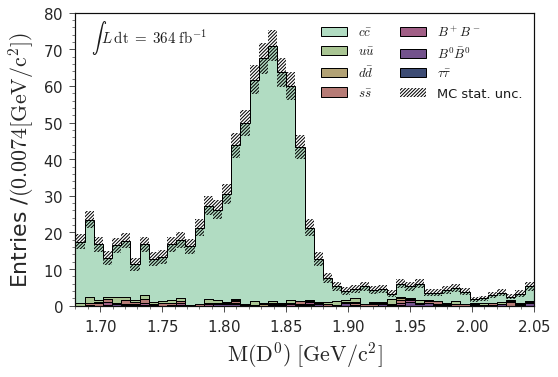

In [21]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1/4
# scale = 1

xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"


luminosity=r"$364\; \mathrm{fb}^{-1}$"
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity=luminosity)
plt.tight_layout()
# plt.savefig("/media/jykim/T7/saved_plots/DRAW/phigamma/MC15rd/MC15rd_phi_4S_optimized_D0M.png")

# plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/BelleII_phi_4S_optimzied_nopi0veto_D0.png")

# plt.hist(pd_ccbar_signal.D0_M, bins=np.linspace(1.68,2.05,51))

[ 2.5  12.5  21.75 22.75 26.   22.25 23.75 19.75 18.75 15.5  23.5  18.5
 19.75 22.25 16.25 17.25 20.25 15.   15.   18.5  12.75 14.75 14.25 15.75
 15.75 17.   16.5  17.25 15.75 18.25 18.5  18.25 17.75 21.25 16.5  17.75
 23.25 18.25 20.   19.5  22.   17.   20.25 20.   21.   26.25 22.5  22.
 13.25  2.  ]
fitst_bin_entries=2.5


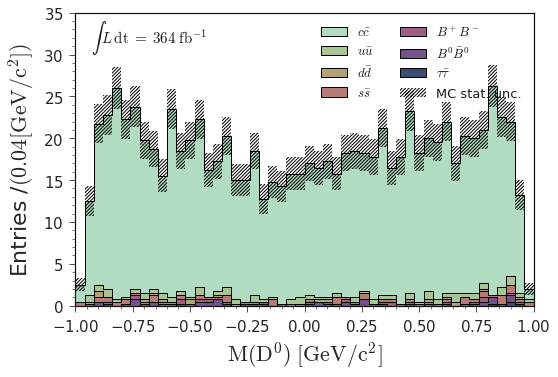

In [23]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Dstarp_cosAngleBetweenMomentumAndVertexVectorInXYPlane'
var = 'Dstarp_cosAngleBetweenMomentumAndVertexVector'

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1/4
# scale = 1

# xrange = (1.68,2.05)
xrange = (-1,1)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"


luminosity=r"$364\; \mathrm{fb}^{-1}$"
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity=luminosity)
plt.tight_layout()
# plt.savefig("/media/jykim/T7/saved_plots/DRAW/phigamma/MC15rd/MC15rd_phi_4S_optimized_D0M.png")

# plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/BelleII_phi_4S_optimzied_nopi0veto_D0.png")

# plt.hist(pd_ccbar_signal.D0_M, bins=np.linspace(1.68,2.05,51))

[129.5  115.75 118.75 107.75  95.75  87.25  82.25  74.    66.5   60.25
  52.    46.75  41.5   45.    31.5   33.    29.25  24.75  21.75  22.25
  15.75  17.25  16.5   13.75  14.    15.25  12.    14.5   14.5   16.5
  15.    25.75  21.75  26.    31.25  32.5   42.5   39.75  48.25  52.5
  64.    66.25  72.    84.    82.25  90.   101.   103.75 114.5  117.5 ]
fitst_bin_entries=129.5


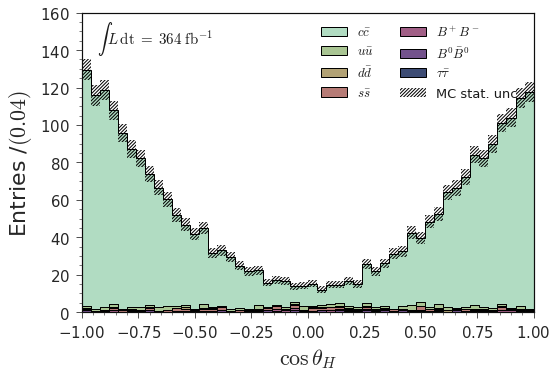

In [17]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_cosHel_0'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1/4
xrange = (-1,1)
# xrange = (1.8,1.9)

nbins = 50
xlabel = r"$\cos\theta_H$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity)
plt.tight_layout()
plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/BelleII_phi_4S_optimzied_nopi0veto_cosHel.png")

# plt.savefig("/media/jykim/T7/saved_plots/DRAW/phigamma/MC15rd/MC15rd_phi_4S_optimized_cosHel.png")

[1.17725e+03 2.55000e+01 1.00000e+00 0.00000e+00 0.00000e+00]
fitst_bin_entries=1177.25


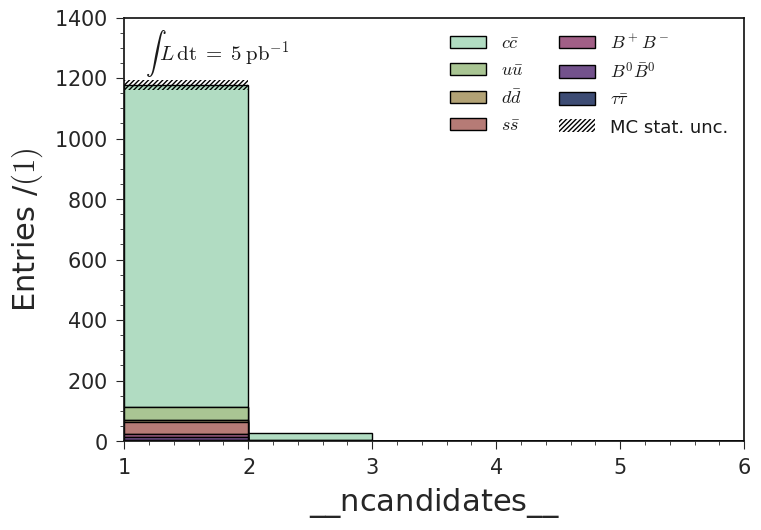

In [20]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = '__ncandidates__'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1/4
xrange = (1,6)
force_range = (1,6)
# xrange = (1.8,1.9)

nbins = 5
xlabel = "__ncandidates__"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",force_range=force_range)
# plt.savefig("MC15rd_phi_1ab_optimized_ncandidates.png")

## FOM

In [182]:
pd_all = pd.concat([pd_ccbar,
                    pd_uubar,
                    pd_ddbar,
                    pd_ssbar,
                    pd_charged,
                    pd_mixed,
                    pd_taupair], ignore_index=True)

# pd_all = pd_ccbar

In [183]:
def calculate_FOM( bkg_pd, sig_pd, cut_list, scale_factor, cut):
    
    FOM_list = list()
    
    for cut_value in cut_list:
    
        temp_cut = cut + str(cut_value) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)

#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))

        FOM_list.append(FOM)    
    
    return FOM_list

In [184]:
def calculate_eff( bkg_pd, sig_pd, cut_list, cut):
    
    eff_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut = cut + str(cut_value) 

        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)

        eff = nsig/(0.5*1e+6)
        eff_list.append(eff)    
    
    return eff_list

In [185]:
def calculate_purity( bkg_pd, sig_pd, cut_list, cut):
    
    purity_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut =  cut +  str(cut_value) 
        
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        
        nREALsig = len(temp_sig_pd.query("Dstarp_isSignal==1"))
        
        #nbkg = len(temp_bkg_pd)

        purity = nREALsig/nsig
        purity_list.append(purity)    
    
    return purity_list

In [186]:
def plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list, xlabel ,offset=85):


    fig, host = plt.subplots(figsize=(9,6)) # (width, height) in inches    
    par1 = host.twinx()
    # par2 = host.twinx()

    #host.set_xlim(2, 3.5)
    # host.set_ylim(0, 2)
    # par2.set_ylim(0, 4)
    #par1.set_ylim(0,0.16 )
    # par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                            # offset=(offset, 0))
    # par2.axis["right"].toggle(all=True)

    host.set_xlabel(xlabel)
    host.set_ylabel("FOM")
    par1.set_ylabel("Efficiency")
    # par2.set_ylabel("Purity")

    # color1 = plt.cm.viridis(0)
    # color2 = plt.cm.viridis(0.5)
    # color3 = plt.cm.viridis(.9)
    color1 = 'r'
    color2 = 'g'
    color3 = 'b'

    p1, = host.plot(FOM_cut_list, FOM_phig_list,    color=color1, label="FOM")
    p2, = par1.plot(FOM_cut_list, eff_phig_list,    color=color2, label="Efficiency")
    # p3, = par2.plot(FOM_cut_list, purity_phig_list, color=color3, label="Purity")

    
    # lns = [p1, p2, p3]
    lns = [p1, p2]

    host.legend(handles=lns, loc='best')
    # right, left, top, bottom
    offset = offset
    # par2.spines['right'].set_position(('outward', offset))

    # no x-ticks                 
    # par2.xaxis.set_ticks([])

    # Sometimes handy, same for xaxis
    # par2.yaxis.set_ticks_position('right')

    # Move "Velocity"-axis to the left
    # par2.spines['left'].set_position(('outward', 60))
    # par2.spines['left'].set_visible(True)
    # par2.yaxis.set_label_position('left')
    # par2.yaxis.set_ticks_position('left')

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    # par2.yaxis.label.set_color(p3.get_color())

    plt.title(r'$D^0 \to \phi \gamma$')
    # plt.axvline(x=2.45,  color='orange', linestyle='dotted')

    # Adjust spacings w.r.t. figsize
    fig.tight_layout()

In [187]:
def calculate_FOM_3D(bkg_pd, sig_pd, grid_list, scale_factor, cut_x, cut_y, cut_z):
 
    FOM_list = list()
    
    for points_3d in grid_list:
        
        points_3d_x, points_3d_y, points_3d_z =  points_3d[0], points_3d[1], points_3d[2]
    
        temp_cut = cut_x + str(points_3d_x) + ' & ' +  cut_y + str(points_3d_y) + ' & ' + cut_z + str(points_3d_z) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)    
        
        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)
        # print(str(scale_factor*nsig + nbkg) + ' nsig=' + str(nsig) + ', nbkg=' + str(nbkg) + ', cut=' + temp_cut )
#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM_list.append(FOM)    
        
    return FOM_list

In [188]:
# sigMC_file_loc = base_file_loc + 'topo/resultfile/result_phi/standard.root'
sigMC_file_loc = base_file_loc + 'ccbar/*.root'

# base_filter='D0_M>1.8 && D0_M<1.9 '
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011  && Dstarp_CMS_p>2.5'

# base_filter += '&& nSigCascDcyBr_0==1'
base_filter += '&& Dstarp_isSignal==1'
base_filter+='&& abs(D0_cosHel_0)<0.8'

# base_filter += '&& gamma_E>0.48'

# variables=['D0_M','D0_cosHel_0','Phi_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','gamma_E']
tree='phi'

pd_phigamma_sigMC = get_pd(file=sigMC_file_loc, tree=tree,base_filter=base_filter,variables=variables)
print(len(pd_phigamma_sigMC))

597


In [189]:
# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_v26_half1M_1_pre_ext_signalMC_recon_mdst_phi.root'
# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_phi_*.root'

# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# base_filter='D0_M>1.8 && D0_M<1.9'
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5'

# base_filter += '&& Dstarp_isSignal==1'

# # base_filter += '&& gamma_E>0.48'


# pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)


pd_half_1_sigMC = pd_phigamma_sigMC

scale_factor = len(pd_phigamma_sigMC)/len(pd_half_1_sigMC)
print(scale_factor)

1.0


In [190]:
pd_ccbar.describe()

,__experiment__,__run__,__event__,__ncandidates__,__candidate__,Dstarp_chiProb,D0_M,D0_cosHel_0,Phi_M,Dstarp_CMS_p,gamma_E,gamma_genMotherPDG,Dstarp_isSignal,Dstarp_delM,D0_flightDistance,D0_flightDistanceErr,Pi0_Prob2,rank
count,3159.000000,3159.000000,3.159000e+03,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3082.0,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000
mean,18.483697,1837.696739,4.564529e+05,1.018677,0.007914,0.362901,1.835566,-0.004312,1.019843,3.330478,1.264979,107.908832,0.0,0.145485,0.021267,0.011066,0.415107,1.003166
std,4.963544,1569.349892,5.344147e+05,0.140001,0.088621,0.296103,0.022474,0.584807,0.004300,0.567830,0.710264,118.207694,0.0,0.000418,0.030288,0.006974,0.283903,0.056183
min,7.000000,26.000000,9.900000e+01,1.000000,0.000000,0.001016,1.800039,-0.799571,1.008665,2.500152,0.299478,-3112.000000,0.0,0.144701,-0.168182,0.002770,0.018559,1.000000
25%,14.000000,729.000000,1.106495e+05,1.000000,0.000000,0.089153,1.818313,-0.600009,1.017529,2.841305,0.640701,111.000000,0.0,0.145156,0.003663,0.006757,0.131073,1.000000
50%,18.000000,1343.000000,2.763260e+05,1.000000,0.000000,0.297708,1.832745,-0.049893,1.019568,3.241431,1.188915,111.000000,0.0,0.145476,0.015794,0.009354,0.394716,1.000000
75%,22.000000,2489.500000,6.031430e+05,1.000000,0.000000,0.596046,1.849518,0.597142,1.022130,3.751046,1.768693,111.000000,0.0,0.145807,0.033456,0.012971,0.707098,1.000000
max,26.000000,6427.000000,4.084295e+06,3.000000,1.000000,0.997751,1.899979,0.799998,1.030464,4.796488,3.688370,421.000000,0.0,0.146300,0.273099,0.106569,0.855389,2.000000


In [191]:
X, Y, Z = np.mgrid[0.3:0.7:41j, 0.00:0.85:86j, 0.0004:0.0008:41j]
a = zip(X.ravel(), Y.ravel(), Z.ravel())
A_list = list(a)

grid_list = A_list
cut_x = 'gamma_E > '
cut_y = 'Pi0_Prob2 > '
cut_z = 'abs(Dstarp_delM - 0.1455) < '

scale_factor=scale_factor

FOM_phig_list = calculate_FOM_3D(pd_all,pd_half_1_sigMC, grid_list ,scale_factor, cut_x,  cut_y, cut_z )


In [192]:
# Number to be equally divided
number_to_divide = 2

# Update each element in the list
for i in range(len(FOM_phig_list)):
    FOM_phig_list[i] = FOM_phig_list[i]/number_to_divide


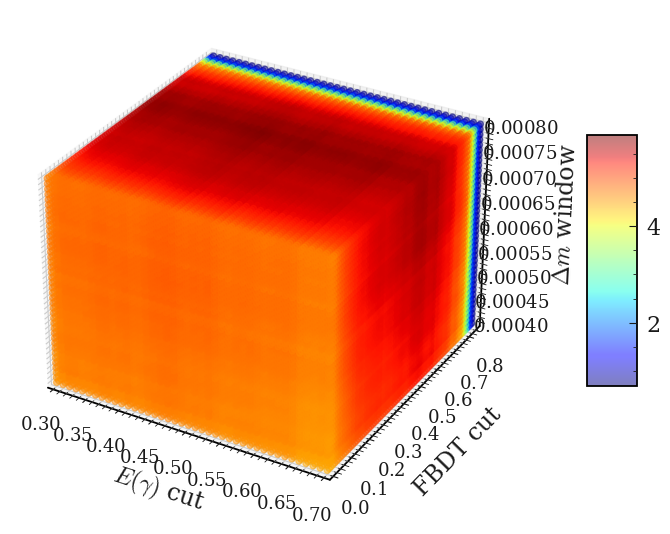

In [193]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# scat = ax.scatter(X, Y, Z, c=T.flatten(), alpha=0.5)
scat = ax.scatter(X, Y, Z, c=FOM_phig_list, alpha=0.5, cmap = 'jet')
# scat = ax.scatter(X, Y, Z, c=FOM_phig_list, alpha=0.5)

fig.colorbar(scat, shrink=0.5, aspect=5 , pad = 0.1)

ax.set_xlabel(r'$E(\gamma)$ cut',fontsize=17)
#ax.set_ylabel(r'Second FBDT cut',fontsize=17)
ax.set_ylabel(r'FBDT cut',fontsize=17)
ax.set_zlabel(r'$\Delta m$ window',fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=13)

# Set axis ranges to their full extent
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())


# ax.ticklabel_format(axis = 'z',  style='sci', scilimits = (0,1))
# ax.dist = 10
ax.xaxis.labelpad=8
ax.yaxis.labelpad=12
ax.zaxis.labelpad=15.5


plt.tight_layout()
# plt.savefig('/media/jykim/T7/saved_plots/FOM/MC15rd_Eg_Mgg_FBDT2_phi_opt.png')
plt.show()

In [194]:
#base_filter+='&& abs(D0_cosHel_0)<0.8'

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=5.887543010939901, cut value=(0.47, 0.5, 0.0007700000000000001)


In [90]:
max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=4.828522786235439, cut value=(0.47, 0.5, 0.0007800000000000001)


In [54]:
max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=9.637706846466486, cut value=(0.47, 0.5, 0.0008)
